## Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## loading data

In [2]:
df=pd.read_csv("data.csv")

## Understanding the data

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## Visualization of shot 
- Visualizes shot attempts on the court
- Green indicate Shot Made, Red indicate Shot Missed

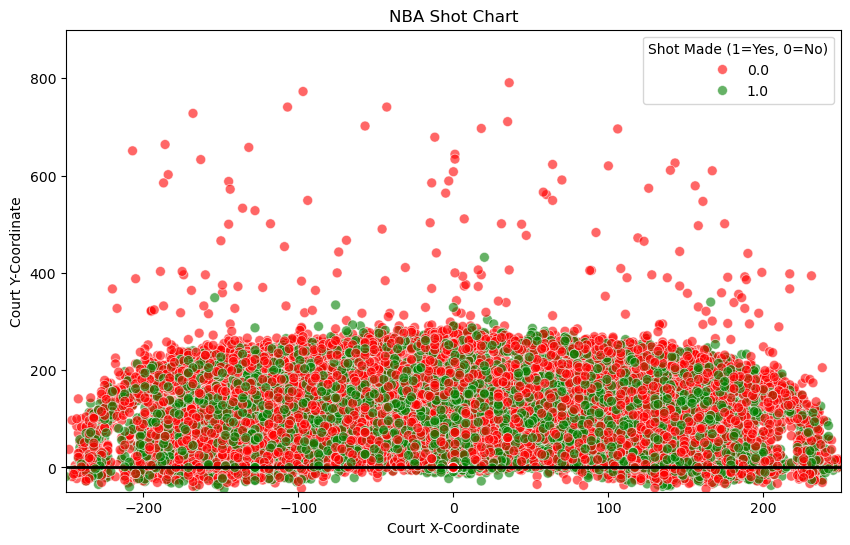

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loc_x', y='loc_y', hue='shot_made_flag', 
                palette={1: 'green', 0: 'red'}, s=50, alpha=0.6)
plt.axhline(0, color='black', linewidth=2)  # Court baseline
plt.xlim(-250, 250)
plt.ylim(-50, 900)  # Adjust based on dataset
plt.title("NBA Shot Chart")
plt.xlabel("Court X-Coordinate")
plt.ylabel("Court Y-Coordinate")
plt.legend(title="Shot Made (1=Yes, 0=No)")
plt.show()

## How Distance affect Shot
- Analying shot efficiency across different distances

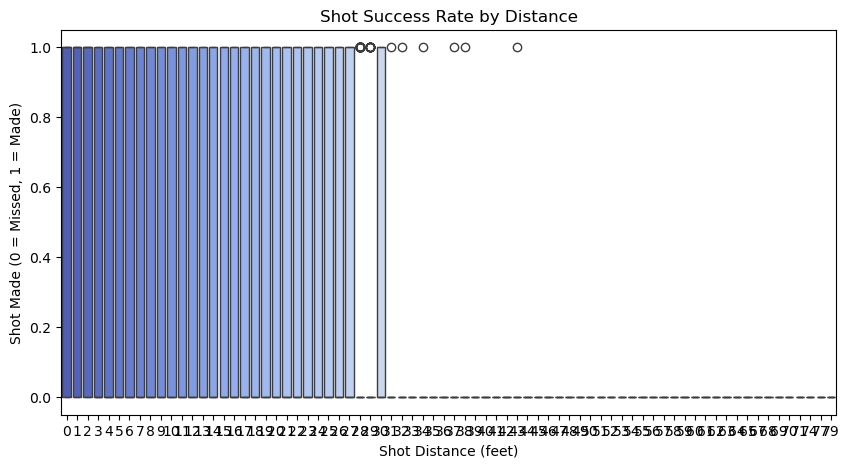

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='shot_distance', y='shot_made_flag', palette="coolwarm")
plt.title("Shot Success Rate by Distance")
plt.xlabel("Shot Distance (feet)")
plt.ylabel("Shot Made (0 = Missed, 1 = Made)")
plt.show()

## Heatmap of Shot
- Visualising where most shots are taken on the court

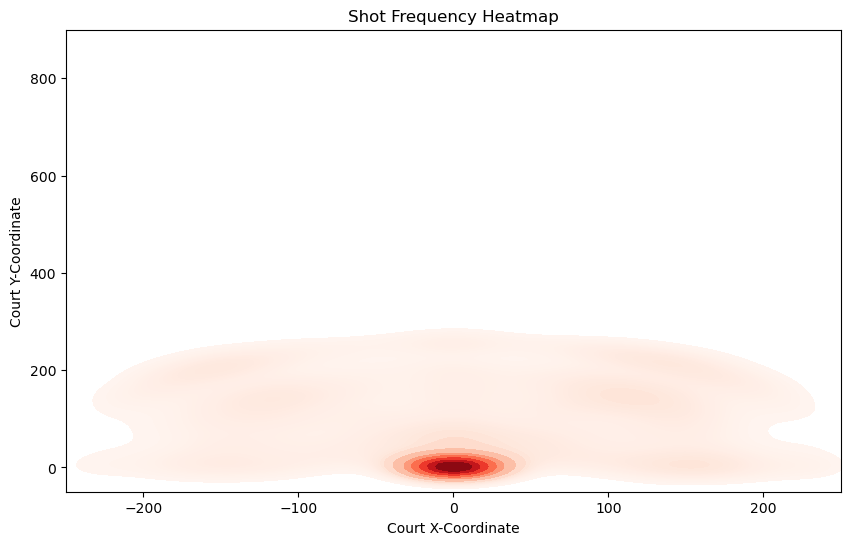

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['loc_x'], y=df['loc_y'], cmap="Reds", fill=True, levels=30)
plt.title("Shot Frequency Heatmap")
plt.xlabel("Court X-Coordinate")
plt.ylabel("Court Y-Coordinate")
plt.xlim(-250, 250)
plt.ylim(-50, 900)
plt.show()

## FG% by Shot Type
- Compares field goal percentage across different shot types

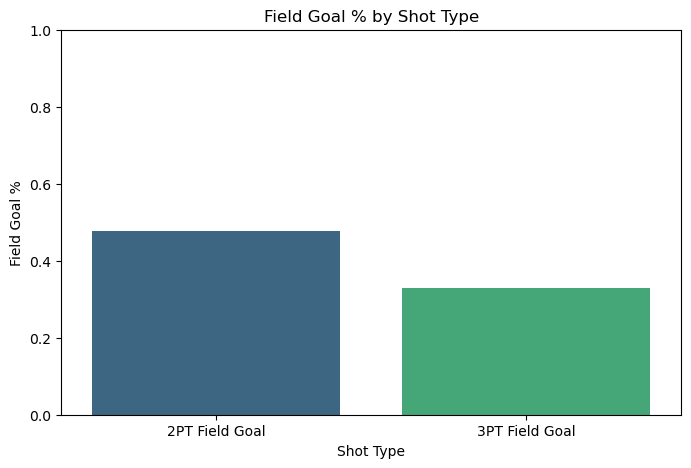

In [9]:
# Compute FG% per shot type
fg_percentage = df.groupby('shot_type')['shot_made_flag'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=fg_percentage, x='shot_type', y='shot_made_flag', palette="viridis")
plt.title("Field Goal % by Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Field Goal %")
plt.ylim(0, 1)  # Since FG% is between 0 and 1
plt.show()

## Shot Distribution by Period

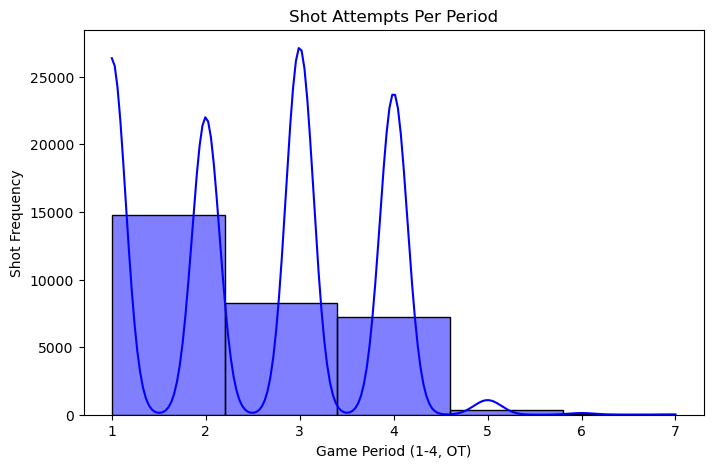

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['period'], bins=5, kde=True, color="blue")
plt.title("Shot Attempts Per Period")
plt.xlabel("Game Period (1-4, OT)")
plt.ylabel("Shot Frequency")
plt.show()

## Correlation Heatmap
- Shows the relationship between features

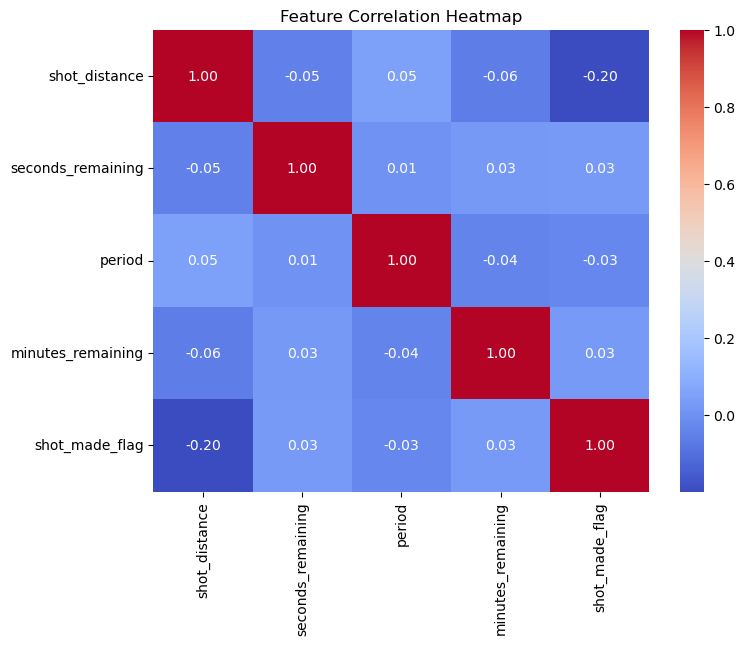

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['shot_distance', 'seconds_remaining', 'period', 
                'minutes_remaining', 'shot_made_flag']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## FG% Over Seasons
- Tracks shooting accuracy over seasons

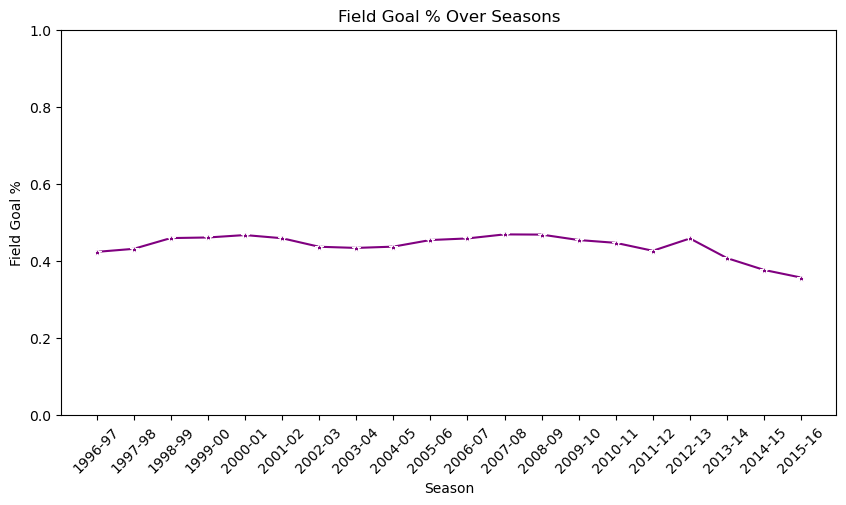

In [12]:
df['season'] = df['season'].astype(str)  # Ensure season is treated as categorical

# Compute FG% per season
fg_by_season = df.groupby('season')['shot_made_flag'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=fg_by_season, x='season', y='shot_made_flag', marker="*", color="purple")
plt.title("Field Goal % Over Seasons")
plt.xlabel("Season")
plt.ylabel("Field Goal %")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

## Shot Distribution by Opponent
- Shows how shooting tendencies vary against different teams

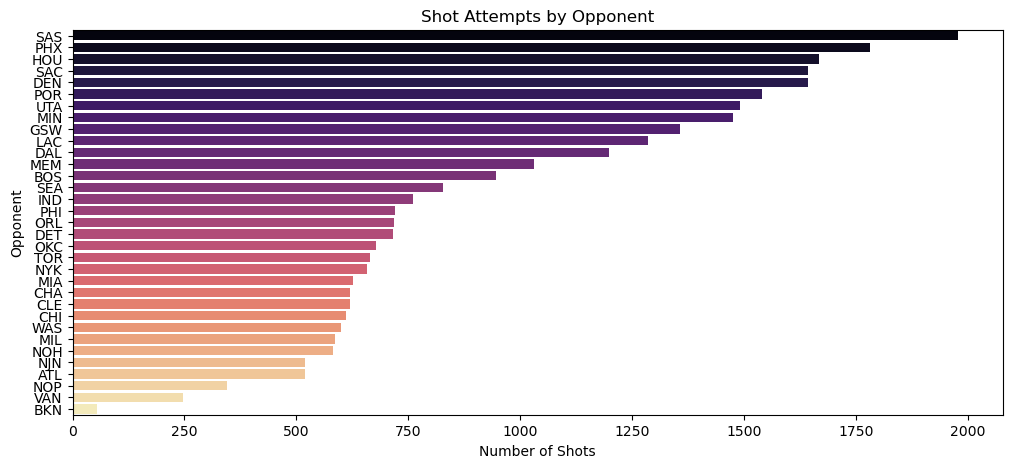

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='opponent', order=df['opponent'].value_counts().index, palette="magma")
plt.title("Shot Attempts by Opponent")
plt.xlabel("Number of Shots")
plt.ylabel("Opponent")
plt.show()

## Preprocessing 

- Drop the unnessary colums

In [14]:
df=df.drop(df[["game_id","team_id","team_name","shot_id","season","game_date","matchup"]],axis=1)

- caluculating the time remaing by minutes_remaining and seconds_remaining

In [15]:
df['time_left']=df['minutes_remaining']*60 + df['seconds_remaining']
df=df.drop(df[["minutes_remaining","seconds_remaining"]],axis=1)

In [16]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
period                   0
playoffs                 0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
opponent                 0
time_left                0
dtype: int64

- encoding the categorical data

In [17]:
df = pd.get_dummies(df, columns=['action_type', 'combined_shot_type', 'shot_type', 
                                 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 
                                 'opponent'], drop_first=True)


- normalizing the numerical data

In [18]:
from sklearn.preprocessing import StandardScaler

num_cols = ['lat', 'lon', 'loc_x', 'loc_y', 'shot_distance', 'time_left']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Columns: 119 entries, game_event_id to opponent_WAS
dtypes: bool(109), float64(7), int64(3)
memory usage: 5.5 MB


- filling the missing values

In [20]:
missing_df = df[df['shot_made_flag'].isnull()]
train_df = df.dropna(subset=['shot_made_flag'])

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Columns: 119 entries, game_event_id to opponent_WAS
dtypes: bool(109), float64(7), int64(3)
memory usage: 4.8 MB


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
X = train_df.drop(columns=['shot_made_flag'])
y = train_df['shot_made_flag']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_missing = missing_df.drop(columns=['shot_made_flag'])

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
missing_df['shot_made_flag'] = rf.predict(X_missing)
df.update(missing_df)

In [28]:
print(df['shot_made_flag'].isnull().sum()) # 0 represent no nan values

0


In [29]:
df['shot_made_flag'].value_counts()


shot_made_flag
0.0    17474
1.0    13223
Name: count, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [31]:
y_pred = rf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.653307392996109
F1 Score: 0.5540540540540541


In [33]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score:", f1_weighted)

Weighted F1 Score: 0.6452521411087047


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72      2887
         1.0       0.64      0.49      0.55      2253

    accuracy                           0.65      5140
   macro avg       0.65      0.64      0.64      5140
weighted avg       0.65      0.65      0.65      5140



## Model Building

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import tensorflow as tf
from tensorflow import keras

- Logistic Regression

In [36]:
lr = LogisticRegression(C=10, solver='liblinear')
lr.fit(X_train, y_train)
y_pred_logreg = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.6819066147859922
F1 Score: 0.557510148849797
              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75      2887
         1.0       0.71      0.46      0.56      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.65      5140
weighted avg       0.69      0.68      0.67      5140



- XGBoost

In [37]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.6817120622568094
F1 Score: 0.5637333333333333
              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      2887
         1.0       0.71      0.47      0.56      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.66      0.66      5140
weighted avg       0.69      0.68      0.67      5140



- Support Vector Meachine

In [38]:
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5616731517509728
F1 Score: 0.0
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      2887
         1.0       0.00      0.00      0.00      2253

    accuracy                           0.56      5140
   macro avg       0.28      0.50      0.36      5140
weighted avg       0.32      0.56      0.40      5140



- Neural Network

In [39]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("F1 Score:", f1_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Epoch 1/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5510 - loss: 1.0936 - val_accuracy: 0.6058 - val_loss: 0.9747
Epoch 2/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6271 - loss: 0.6927 - val_accuracy: 0.6428 - val_loss: 0.7104
Epoch 3/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6352 - loss: 0.6892 - val_accuracy: 0.5259 - val_loss: 0.7117
Epoch 4/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6304 - loss: 0.6818 - val_accuracy: 0.6749 - val_loss: 0.6314
Epoch 5/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6424 - loss: 0.6754 - val_accuracy: 0.5031 - val_loss: 0.8120
Epoch 6/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6507 - loss: 0.6479 - val_accuracy: 0.6811 - val_loss: 0.6168
Epoch 7/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6554 - loss: 0.6473 - val_accuracy: 0.6521 - val_loss: 0.7016
Epoch 8/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6470 - loss: 0.6519 - val_accuracy: 0.

In [40]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

Logistic Regression Accuracy: 0.6819066147859922
XGBoost Accuracy: 0.6817120622568094
SVM Accuracy: 0.5616731517509728
Neural Network Accuracy: 0.6682879377431906


## Best model : Logistic Regression
- the accuracy is higher then other models